## Goal: test the reconstructed Hamiltonian Eq. (29) for different models

## Models:
1. critical Ising model (c=1/2): $\sum - Z - XX$
2. critical three-state Potts model (c=4/5): $\sum - Z_3 - Z_3^\dagger - X_3 X_3^\dagger - X_3^\dagger X_3$
3. XX model (c=1): $\sum XX + YY$
4. Heisenberg model (c=1): $\sum XX + YY + ZZ$

## Usage: test(model, L, n=20)
Plot the lowest $n$ eigenvalues of the original Hamiltonian and the reconstructed Hamiltonian of length $L$,
where the original Hamiltonian is rescaled to match the reconstructed Hamiltonian. 
We also rescale the Hamiltonians by $\frac{L}{2 \pi}$, so that it is easier to compare the spectrum to the scaling dimension $\Delta$. 
Recall $H_{rec} |\Delta, s \rangle \approx \frac{2\pi}{L} \Delta |\Delta, s \rangle$.

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True, linewidth=np.inf)
import matplotlib.pyplot as plt
from utils import *

In [7]:
def state_to_H(psi):
  d = psi.shape[0]
  L = len(psi.shape)

  rho1 = density_matrix(psi, [0])
  rho2 = density_matrix(psi, [0,1])

  K1 = K(rho1)
  K2 = K(rho2)

  S1 = entropy(rho1)
  S2 = entropy(rho2)

  H_local = ((K2 - extend(K1, [0], [d, d])) - (S2 - S1) * np.eye(d**2).reshape([d]*4)) / (2 * L * np.sin(np.pi / L)**2 / np.sin(2 * np.pi / L))

  return cyclic_operator(H_local, L)

def test(model, L, n=20, xticks=None, yticks=None):
  H = gen_Hamiltonian(model, L)
  d = H.shape[0]
  psi = ground_state(H)
  H_new = state_to_H(psi) * L / 2 / np.pi

  H = H.reshape(d**L, d**L)
  eigvals = np.linalg.eigvalsh(H)

  H_new = H_new.reshape(d**L, d**L)
  eigvals_new = np.linalg.eigvalsh(H_new)
  print(f'E_gnd = {eigvals_new[0]}')

  plt.figure(figsize=(4,3))
  n = min(n, len(eigvals))
  X = np.arange(n)
  plt.scatter(X, (eigvals[:n] - eigvals[0]) / (eigvals[n-1] - eigvals[0]) * (eigvals_new[n-1] - eigvals_new[0]), s=50, marker='o', facecolors='none', edgecolors='r', label='original')
  plt.scatter(X, eigvals_new[:n] - eigvals_new[0], s=30, marker='x', c='b', label='reconstructed')
  plt.grid()
  plt.legend()
  plt.xlabel('')
  plt.ylabel('Rescaled Energy')
  plt.xticks(xticks)
  plt.yticks(yticks)
  plt.tight_layout()

E_gnd = -4.410003357216577e-05


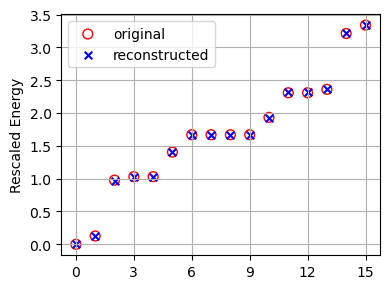

In [8]:
test('Ising', 4, n=40, xticks=[0, 3, 6, 9, 12, 15])
plt.savefig('reconstructed-H-Ising-L=4.pdf', dpi=300)

E_gnd = -0.00036509683412850057


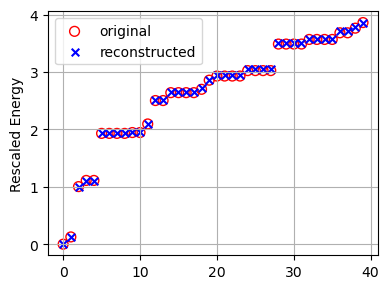

In [9]:
test('Ising', 8, n=40)
plt.savefig('reconstructed-H-Ising-L=8.pdf', dpi=300)

E_gnd = -0.0009337376520369622


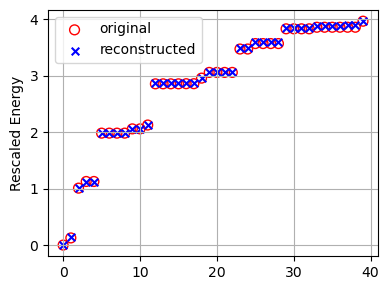

In [10]:
test('Ising', 12, n=40)
plt.savefig('reconstructed-H-Ising-L=12.pdf', dpi=300)

E_gnd = -0.0004870672334017057


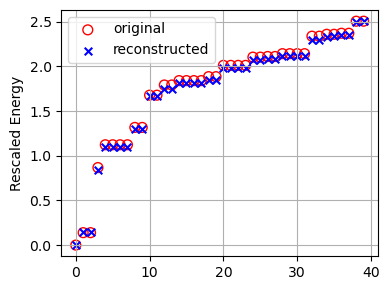

In [11]:
test('Potts', 6, n=40)
plt.savefig('reconstructed-H-Potts-L=6.pdf', dpi=300)

E_gnd = -1.4996312211257953e-58


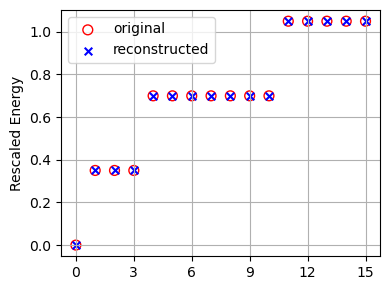

In [12]:
test('Heisenberg', 4, n=40, xticks=[0, 3, 6, 9, 12, 15])
plt.savefig('reconstructed-H-Heisenberg-L=4.pdf', dpi=300)

E_gnd = 2.6645352591003757e-15


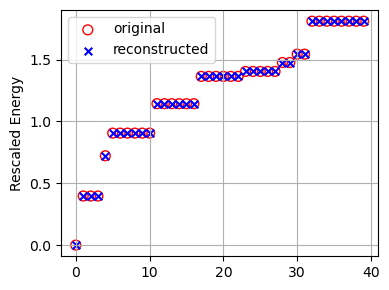

In [13]:
test('Heisenberg', 8, n=40, yticks=[0, 0.5, 1, 1.5])
plt.savefig('reconstructed-H-Heisenberg-L=8.pdf', dpi=300)

E_gnd = 3.4638958368304884e-14


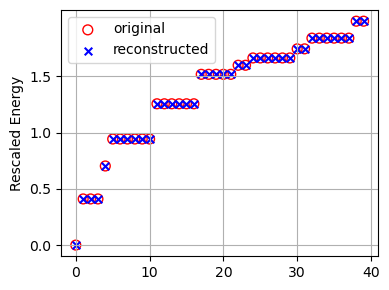

In [16]:
test('Heisenberg', 12, n=40, yticks=[0, 0.5, 1, 1.5])
plt.savefig('reconstructed-H-Heisenberg-L=12.pdf', dpi=300)

E_gnd = -1.9874162444961003e-16


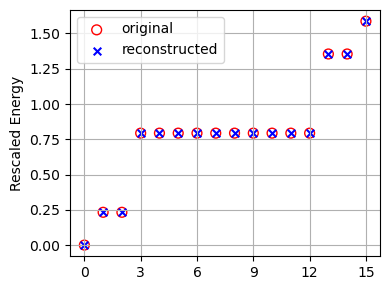

In [14]:
test('XX', 4, n=40, xticks=[0, 3, 6, 9, 12, 15])

E_gnd = 6.4244773776404455e-15


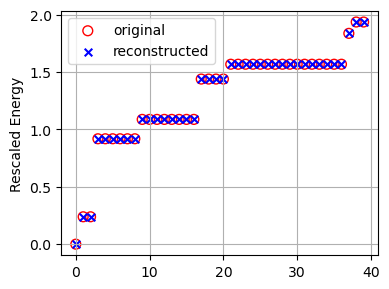

In [15]:
test('XX', 8, n=40)